### Demonstrative notebooks for encoding protein sequences

This notebook facilitates the demonstration of encoder strategies for protein sequences. Specifically, this notebook shows how to use:

- One Hot
- Ordinal Encoder
- Physicochemical Properties
- FFT-based encoder
- Frequency-based methods
- KMers-based approaches

In [1]:
import warnings
warnings.filterwarnings("ignore")

- Loading libraries

In [2]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../src")) 

if project_root not in sys.path:
    sys.path.append(project_root)

print(sys.path)

['/home/diego/miniconda3/envs/protein_engineering/lib/python312.zip', '/home/diego/miniconda3/envs/protein_engineering/lib/python3.12', '/home/diego/miniconda3/envs/protein_engineering/lib/python3.12/lib-dynload', '', '/home/diego/miniconda3/envs/protein_engineering/lib/python3.12/site-packages', '/home/diego/Documents/PythonProjects/training_models_PI/src']


In [3]:
import pandas as pd
from sklearn.utils import shuffle
from preprocessing.encoders import FFTEncoder, FrequencyEncoder, KMersEncoder, OneHotEncoder, OrdinalEncoder, PhysicochemicalEncoder

- Reading input data

In this case, we will make the demonstrative cases with the antimicrobial dataset

In [4]:
df_data = pd.read_csv("../raw_data/Antimicrobial/train_data.csv")
df_data.head(5)

,sequence,label
0,QEDCELCINVACTGC,0
1,MAATTTATSLFSSRLHFQNQNQGYGFPAKTPNSLQVNQIIDGRKMR...,0
2,SKGKKANKDVELARG,1
3,ADLEVVAATYVLVA,1
4,MAESPSESTSDSLSTTTSTKPAQSGTVSISSPQSHHVVFPEIPIEIVS,0


- One hot and ordinal encoder

These two methods facilitate the applycation of dummy encoder methods. In this case, we only will demonstrate the approaches with a few number of examples

In [5]:
one_hot_instance = OneHotEncoder(
    dataset=df_data, 
    sequence_column="sequence", 
    ignore_columns=["label"],
    max_length=50
)

one_hot_instance.run_process()
one_hot_instance.coded_dataset.head()

2025-04-07 09:52:22,472 - ProteinDataValidator - INFO - Checking canonical residues in the dataset (validator.py:42)
2025-04-07 09:52:22,614 - ProteinDataValidator - INFO - Estimating length in protein sequences (validator.py:61)
2025-04-07 09:52:22,620 - ProteinDataValidator - INFO - Evaluating length in protein sequences (validator.py:64)
2025-04-07 09:52:22,622 - OneHotEncoder - INFO - Starting encoding (OneHotEncoder.py:54)


,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_991,p_992,p_993,p_994,p_995,p_996,p_997,p_998,p_999,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
ordinal_encoder_instance = OrdinalEncoder(
    dataset=df_data, 
    sequence_column="sequence", 
    ignore_columns=["label"],
    max_length=50
)

ordinal_encoder_instance.run_process()
ordinal_encoder_instance.coded_dataset.head()

2025-04-07 09:52:25,925 - ProteinDataValidator - INFO - Checking canonical residues in the dataset (validator.py:42)
2025-04-07 09:52:26,043 - ProteinDataValidator - INFO - Estimating length in protein sequences (validator.py:61)
2025-04-07 09:52:26,049 - ProteinDataValidator - INFO - Evaluating length in protein sequences (validator.py:64)
2025-04-07 09:52:26,051 - OrdinalEncoder - INFO - Starting encoding (OrdinalEncoder.py:45)


,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_42,p_43,p_44,p_45,p_46,p_47,p_48,p_49,p_50,label
0,13,3,2,1,3,10,1,7,8,17,...,0,0,0,0,0,0,0,0,0.0,0
1,15,9,5,9,9,0,8,9,2,17,...,0,0,0,0,0,0,0,0,0.0,1
2,0,2,10,3,17,17,0,0,16,19,...,0,0,0,0,0,0,0,0,0.0,1
3,11,0,3,15,12,15,3,15,16,15,...,12,7,3,7,17,15,0,0,0.0,0
4,11,10,14,4,16,6,17,10,8,8,...,0,0,0,0,0,0,0,0,0.0,0


- KMers-based encoder

In [7]:
kmer_instance = KMersEncoder(
    dataset=df_data, 
    sequence_column="sequence", 
    ignore_columns=["label"],
    size_kmer=3
)

kmer_instance.process_dataset()
kmer_instance.coded_dataset

2025-04-07 09:52:26,325 - ProteinDataValidator - INFO - Checking canonical residues in the dataset (validator.py:42)
2025-04-07 09:52:26,443 - ProteinDataValidator - INFO - Estimating length in protein sequences (validator.py:61)
2025-04-07 09:52:26,448 - ProteinDataValidator - INFO - Evaluating length in protein sequences (validator.py:64)


,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


- Frequency based encoder

The parameter max_length need to be configured for the zero padding. However, in the case of protein variants (the same length of the sequences) it is enough with the length of the wild sequence

In [8]:
frequency_instance = FrequencyEncoder(
    dataset=df_data, 
    sequence_column="sequence", 
    ignore_columns=["label"],
    max_length=50
)

frequency_instance.run_process()
frequency_instance.coded_dataset.head(5)

2025-04-07 09:52:27,055 - ProteinDataValidator - INFO - Checking canonical residues in the dataset (validator.py:42)
2025-04-07 09:52:27,172 - ProteinDataValidator - INFO - Estimating length in protein sequences (validator.py:61)
2025-04-07 09:52:27,178 - ProteinDataValidator - INFO - Evaluating length in protein sequences (validator.py:64)
2025-04-07 09:52:27,179 - FrequencyEncoder - INFO - Starting encoding (FrequencyEncoder.py:47)


,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_42,p_43,p_44,p_45,p_46,p_47,p_48,p_49,p_50,label
0,0.066667,0.133333,0.066667,0.266667,0.133333,0.066667,0.266667,0.066667,0.066667,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
1,0.066667,0.266667,0.133333,0.266667,0.266667,0.133333,0.066667,0.266667,0.066667,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
2,0.285714,0.071429,0.142857,0.071429,0.285714,0.285714,0.285714,0.285714,0.071429,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
3,0.020833,0.041667,0.083333,0.270833,0.104167,0.270833,0.083333,0.270833,0.125000,0.270833,...,0.104167,0.083333,0.083333,0.083333,0.083333,0.270833,0.0,0.0,0.0,0
4,0.055556,0.138889,0.138889,0.055556,0.027778,0.055556,0.055556,0.138889,0.055556,0.055556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0


- Physicochemical property encoders and FFT-based encoder

The use of physicochemical encoders depends on the csv file with the encoders. In this case, the folder "input_config" has two dataset with encoders. The first is the encoder of AAIndex and the second is a dataset with encoders generated from semantic clustering using as input the descriptions of the AAIndex.

- Reading the input encoders. In this case, we will use the AAIndex physicochemical properties

In [9]:
input_encoder = pd.read_csv("../input_config/aaindex_encoders.csv")
input_encoder.index = input_encoder["residue"].values
input_encoder.head()

,residue,ANDN920101,ARGP820101,ARGP820102,ARGP820103,BEGF750101,BEGF750102,BEGF750103,BHAR880101,BIGC670101,...,KARS160113,KARS160114,KARS160115,KARS160116,KARS160117,KARS160118,KARS160119,KARS160120,KARS160121,KARS160122
A,A,4.35,0.61,1.18,1.56,1.00,0.77,0.37,0.357,52.6,...,6.0,6.000,6.0,6.0,12.000,6.00,12.000,0.000,6.000,0.000
L,L,4.17,1.53,3.23,2.93,1.00,0.83,0.53,0.365,102.0,...,12.0,15.600,12.0,18.0,30.000,6.00,25.021,0.000,9.600,3.113
R,R,4.38,0.60,0.20,0.45,0.52,0.72,0.84,0.529,109.1,...,19.0,31.444,20.0,38.0,45.000,5.00,23.343,0.000,10.667,4.200
K,K,4.36,1.15,0.06,0.15,0.60,0.55,0.75,0.466,105.1,...,12.0,24.500,18.0,31.0,37.000,6.17,22.739,-0.179,10.167,1.372
N,N,4.75,0.06,0.23,0.27,0.35,0.55,0.97,0.463,75.7,...,12.0,16.500,14.0,20.0,33.007,6.60,27.708,0.000,10.000,3.000


In [10]:
physicochemical_instance = PhysicochemicalEncoder(
    dataset=df_data, 
    sequence_column="sequence", 
    ignore_columns=["label"],
    max_length=50,
    name_property="ARGP820101",
    df_properties=input_encoder
)

physicochemical_instance.run_process()
physicochemical_instance.df_data_encoded.head(5)

2025-04-07 09:52:28,360 - ProteinDataValidator - INFO - Checking canonical residues in the dataset (validator.py:42)
2025-04-07 09:52:28,497 - ProteinDataValidator - INFO - Estimating length in protein sequences (validator.py:61)
2025-04-07 09:52:28,504 - ProteinDataValidator - INFO - Evaluating length in protein sequences (validator.py:64)
2025-04-07 09:52:28,506 - PhysicochemicalEncoder - INFO - Encoding and Processing results (PhysicochemicalEncoder.py:51)
2025-04-07 09:52:29,612 - PhysicochemicalEncoder - INFO - Creating dataset (PhysicochemicalEncoder.py:58)
2025-04-07 09:52:29,613 - PhysicochemicalEncoder - INFO - Exporting dataset (PhysicochemicalEncoder.py:60)


,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_42,p_43,p_44,p_45,p_46,p_47,p_48,p_49,p_50,label
0,0.47,0.46,1.07,0.47,1.53,1.07,2.22,0.06,1.32,0.61,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0
1,0.05,1.15,0.07,1.15,1.15,0.61,0.06,1.15,0.46,1.32,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,1
2,0.61,0.46,1.53,0.47,1.32,1.32,0.61,0.61,0.05,1.88,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,1
3,1.18,0.61,0.47,0.05,1.95,0.05,0.47,0.05,0.05,0.05,...,0.47,2.22,1.32,0.05,0.0,0.0,0.0,0.0,0,0
4,1.18,1.53,0.60,2.02,0.05,0.61,1.32,1.53,0.06,0.06,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0


- Once the physicochemical encoder has been applied, a FFT-based transform can be generated to produce an alternative transformation

In [11]:
fft_instance = FFTEncoder(
    dataset=physicochemical_instance.df_data_encoded, 
    sequence_column="sequence", 
    ignore_columns=["label"]
)

fft_instance.encoding_dataset()
fft_instance.df_fft.head()

2025-04-07 09:52:30,388 - FFTEncoder - INFO - Removing columns data (FFTEncoder.py:27)
2025-04-07 09:52:30,390 - FFTEncoder - INFO - Getting near pow 2 value (FFTEncoder.py:35)
2025-04-07 09:52:30,391 - FFTEncoder - INFO - Applying zero padding (FFTEncoder.py:49)
2025-04-07 09:52:32,095 - FFTEncoder - INFO - Creating dataset (FFTEncoder.py:88)
2025-04-07 09:52:32,095 - FFTEncoder - INFO - Exporting dataset (FFTEncoder.py:90)


,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_23,p_24,p_25,p_26,p_27,p_28,p_29,p_30,p_31,label
0,11.54,10.877525,9.072347,6.617258,4.179077,2.433426,1.711014,1.420103,1.028057,0.732624,...,0.888172,1.319507,1.671883,2.144617,2.846879,3.585711,4.082729,4.204985,4.065425,0
1,10.45,9.734584,7.758625,4.986741,2.073977,0.872207,2.372149,3.023772,2.784621,1.966112,...,1.601796,1.887878,2.041305,1.798725,1.103576,0.716607,1.904474,3.242520,4.215803,1
2,13.64,12.654231,9.937319,6.148215,2.276297,1.859492,3.914161,4.749295,4.414119,3.400864,...,0.883138,1.609954,2.254046,2.742977,3.035804,3.079051,2.801255,2.157088,1.182592,1
3,35.59,15.184089,13.460313,8.597916,5.842053,5.081926,2.723396,3.536184,8.077508,5.816234,...,1.316577,5.831917,6.065166,5.170851,5.365212,7.449582,4.939812,3.213988,7.278590,0
4,28.44,14.080404,5.977206,4.809730,6.238447,1.911390,5.903140,3.390447,3.869664,0.804363,...,5.362877,3.878827,3.916763,2.238962,2.617770,2.291193,3.375534,5.546504,7.179156,0


- Only as demonstrative case, we will export the dataset procesed for AMP using physicochemical properties (all data and all datasets) and in the case of solubility, all dataset but only a random selection of the data. Moreover, as a demonstrative application, the AAIndex property: ARGP820103 will be used

In [12]:
for element in ["test_data", "train_data", "val_data"]:
    df = pd.read_csv(f"../raw_data/Antimicrobial/{element}.csv")

    physicochemical_instance = PhysicochemicalEncoder(
        dataset=df, 
        sequence_column="sequence", 
        ignore_columns=["label"],
        max_length=50,
        name_property="ARGP820103",
        df_properties=input_encoder
    )

    physicochemical_instance.run_process()
    physicochemical_instance.df_data_encoded.to_csv(f"../processed_dataset/antimicrobial/{element}.csv", index=False)


2025-04-07 09:52:33,985 - ProteinDataValidator - INFO - Checking canonical residues in the dataset (validator.py:42)
2025-04-07 09:52:34,003 - ProteinDataValidator - INFO - Estimating length in protein sequences (validator.py:61)
2025-04-07 09:52:34,005 - ProteinDataValidator - INFO - Evaluating length in protein sequences (validator.py:64)
2025-04-07 09:52:34,006 - PhysicochemicalEncoder - INFO - Encoding and Processing results (PhysicochemicalEncoder.py:51)
2025-04-07 09:52:34,164 - PhysicochemicalEncoder - INFO - Creating dataset (PhysicochemicalEncoder.py:58)
2025-04-07 09:52:34,164 - PhysicochemicalEncoder - INFO - Exporting dataset (PhysicochemicalEncoder.py:60)
2025-04-07 09:52:34,230 - ProteinDataValidator - INFO - Checking canonical residues in the dataset (validator.py:42)
2025-04-07 09:52:34,345 - ProteinDataValidator - INFO - Estimating length in protein sequences (validator.py:61)
2025-04-07 09:52:34,352 - ProteinDataValidator - INFO - Evaluating length in protein sequence

In [13]:
for element in ["test_data", "train_data", "val_data"]:
    df = pd.read_csv(f"../raw_data/protein_solubility/{element}.csv")

    number_selecting = int(df.shape[0]*0.2)
    
    df = shuffle(df, random_state=42, n_samples=number_selecting)

    physicochemical_instance = PhysicochemicalEncoder(
        dataset=df, 
        sequence_column="sequence", 
        ignore_columns=["response"],
        max_length=1024,
        name_property="ARGP820103",
        df_properties=input_encoder
    )

    physicochemical_instance.run_process()
    physicochemical_instance.df_data_encoded.to_csv(f"../processed_dataset/protein_solubility/{element}.csv", index=False)


2025-04-07 09:52:37,604 - ProteinDataValidator - INFO - Checking canonical residues in the dataset (validator.py:42)
2025-04-07 09:52:37,712 - ProteinDataValidator - INFO - Estimating length in protein sequences (validator.py:61)
2025-04-07 09:52:37,714 - ProteinDataValidator - INFO - Evaluating length in protein sequences (validator.py:64)
2025-04-07 09:52:37,715 - PhysicochemicalEncoder - INFO - Encoding and Processing results (PhysicochemicalEncoder.py:51)
2025-04-07 09:52:40,624 - PhysicochemicalEncoder - INFO - Creating dataset (PhysicochemicalEncoder.py:58)
2025-04-07 09:52:40,625 - PhysicochemicalEncoder - INFO - Exporting dataset (PhysicochemicalEncoder.py:60)
2025-04-07 09:52:42,399 - ProteinDataValidator - INFO - Checking canonical residues in the dataset (validator.py:42)
2025-04-07 09:52:43,104 - ProteinDataValidator - INFO - Estimating length in protein sequences (validator.py:61)
2025-04-07 09:52:43,111 - ProteinDataValidator - INFO - Evaluating length in protein sequence

### Embedding processes examples

Additionally, embedding-based encoding has been incorporated using:
- A specific class for Ankh2
- A specific class for Bert
- A specific class for Prot5
- A generalized class for broader usage

In [ ]:
from preprocessing.embeddings import Ankh2Based

ankh2_instance = Ankh2Based(
    dataset=df_data[:200],
    column_seq="sequence"
)

2025-04-02 14:22:45,768 - EmbeddingsBase(ElnaggarLab/ankh2-ext1) - INFO - Using device: cuda (EmbeddingsBase.py:41)


In [7]:
print("Loading model/tokenizer")
ankh2_instance.loadModelTokenizer()

Loading model/tokenizer


In [8]:
print("Generating embedding")
df_embedding = ankh2_instance.embeddingProcess(batch_size=50)

Generating embedding


[+] Embedding: 100%|██████████| 4/4 [00:07<00:00,  1.91s/batch]


In [9]:
print(df_embedding)

          p_1       p_2       p_3       p_4       p_5       p_6       p_7  \
0    0.149863 -0.035694  0.036361 -0.013962  0.162057 -0.067487 -0.002353   
1    0.053837 -0.056339  0.000874  0.020594  0.084865 -0.054365  0.027647   
2    0.157431 -0.091345 -0.003020  0.032494  0.192341 -0.061084  0.013047   
3    0.166904 -0.035836  0.043358 -0.015986  0.149431 -0.066942 -0.007488   
4    0.128852 -0.032329  0.020358  0.023163  0.113157 -0.044133  0.013229   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.177633 -0.095289  0.007229  0.061282  0.271956 -0.064642  0.017754   
196  0.104174 -0.068498 -0.022664  0.039372  0.145229 -0.040566  0.005452   
197  0.162120 -0.055424  0.037040  0.010118  0.124661 -0.068138  0.004036   
198  0.104995 -0.018094  0.035171 -0.003373  0.148180 -0.035572  0.007208   
199  0.113907 -0.035908  0.028191 -0.004449  0.037927 -0.055291  0.003372   

          p_8       p_9      p_10  ...    p_1527    p_1528    p_1529  \
0  

In [ ]:
ankh2_instance.unloadModelTokenizer()

2025-03-26 13:24:58,582 - EmbeddingsBase(ElnaggarLab/ankh2-ext1) - INFO - 7165.85 MB released from memory (Ankh2Based.py:39)


In [ ]:
ankh2_instance.cleaning_memory()
print("Process finished")

2025-03-26 13:25:01,079 - EmbeddingsBase(ElnaggarLab/ankh2-ext1) - INFO - Cleaning cache memory (EmbeddingsBase.py:47)
2025-03-26 13:25:01,080 - EmbeddingsBase(ElnaggarLab/ankh2-ext1) - INFO - Current memory usage: 8.12 MB (EmbeddingsBase.py:50)


Process finished


In [ ]:
from preprocessing.embeddings import BertBased

bert_instance = BertBased(
    dataset=df_data[:50],
    column_seq="sequence"
)

2025-03-26 13:25:16,805 - EmbeddingsBase(Rostlab/prot_bert) - INFO - Using device: cuda (EmbeddingsBase.py:41)


In [ ]:
print("Loading model/tokenizer")
bert_instance.loadModelTokenizer()

Loading model/tokenizer


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
bert_instance.dataset

In [ ]:
print("Generating embedding")
df_embedding = bert_instance.embeddingProcess(batch_size=50)

Generating embedding


[+] Embedding: 100%|██████████| 1/1 [00:00<00:00, 19.59batch/s]


In [ ]:
print(df_embedding)

         p_1       p_2       p_3       p_4       p_5       p_6       p_7  \
0   0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
1   0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
2   0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
3   0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
4   0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
5   0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
6   0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
7   0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
8   0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
9   0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
10  0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
11  0.093044 -0.009817 -0.043743 -0.313231  0.258464 -0.044971 -0.041745   
12  0.093044

In [ ]:
from preprocessing.embeddings import Prot5Based

prot5_instance = Prot5Based(
    dataset=df_data[:50],
    column_seq="sequence"
)

2025-03-28 14:39:26,250 - EmbeddingsBase(Rostlab/prot_t5_xl_uniref50) - INFO - Using device: cuda (EmbeddingsBase.py:41)


In [ ]:
prot5_instance.loadModelTokenizer()

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
df_embedding = prot5_instance.embeddingProcess(batch_size=50)

[+] Embedding: 100%|██████████| 1/1 [00:00<00:00,  3.44batch/s]


In [ ]:
print(df_embedding)

         p_1       p_2       p_3       p_4       p_5      p_6       p_7  \
0  -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
1  -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
2  -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
3  -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
4  -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
5  -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
6  -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
7  -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
8  -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
9  -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
10 -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
11 -0.006401 -0.118599 -0.030114  0.004882 -0.004407  0.00955  0.037922   
12 -0.006401 -0.118599 -0

# Generalized protein embedder

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../src")) 

if project_root not in sys.path:
    sys.path.append(project_root)

print(sys.path)

['/home/diego/miniconda3/envs/protein_engineering/lib/python312.zip', '/home/diego/miniconda3/envs/protein_engineering/lib/python3.12', '/home/diego/miniconda3/envs/protein_engineering/lib/python3.12/lib-dynload', '', '/home/diego/miniconda3/envs/protein_engineering/lib/python3.12/site-packages', '/home/diego/Documents/PythonProjects/training_models_PI/src']


In [2]:
from preprocessing.embeddings import ProteinEmbedder
import pandas as pd

/home/diego/miniconda3/envs/protein_engineering/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_data = pd.read_csv("../raw_data/Antimicrobial/train_data.csv")
df_data.head(5)

,sequence,label
0,QEDCELCINVACTGC,0
1,MAATTTATSLFSSRLHFQNQNQGYGFPAKTPNSLQVNQIIDGRKMR...,0
2,SKGKKANKDVELARG,1
3,ADLEVVAATYVLVA,1
4,MAESPSESTSDSLSTTTSTKPAQSGTVSISSPQSHHVVFPEIPIEIVS,0


### Load Hugging Face Model

In [ ]:
# More models for hf_path are:
# ElnaggarLab/ankh2-ext1
# monsoon-nlp/protein-matryoshka-embeddings
# Rostlab/prot_bert
# facebook/esm2_t6_8M_UR50D
# RaphaelMourad/Mistral-Prot-v1-134M
# Rostlab/prot_t5_xl_uniref50
instance = ProteinEmbedder(
    device="cuda", 
    hf_path="facebook/esm2_t6_8M_UR50D", 
    dataset=df_data[:50], 
    column_seq="sequence", 
    column_label="label",
    columns_ignore=["response", "label"]
)

2025-04-18 16:00:48,701 - ProteinEmbedder_facebook/esm2_t6_8M_UR50D - INFO - Using device: cuda (ProteinEmbedder.py:63)


In [5]:
instance.loadModelTokenizer()

2025-04-18 16:00:50,636 - ProteinEmbedder_facebook/esm2_t6_8M_UR50D - INFO - Loading model and tokenizer for facebook/esm2_t6_8M_UR50D (ProteinEmbedder.py:79)
2025-04-18 16:00:50,636 - ProteinEmbedder_facebook/esm2_t6_8M_UR50D - INFO - Model architecture: EsmForMaskedLM (ProteinEmbedder.py:80)
Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025-04-18 16:00:51,173 - ProteinEmbedder_facebook/esm2_t6_8M_UR50D - INFO - Model and tokenizer for facebook/esm2_t6_8M_UR50D loaded successfully. (ProteinEmbedder.py:105)


In [6]:
instance.showMemoryUsage()

2025-04-18 16:00:53,747 - ProteinEmbedder_facebook/esm2_t6_8M_UR50D - INFO - Current memory usage: 29.93 MB (ProteinEmbedder.py:134)


In [7]:
instance.embeddingProcess(batch_size=10)

2025-04-18 16:00:54,713 - ProteinEmbedder_facebook/esm2_t6_8M_UR50D - INFO - Starting embedding process (ProteinEmbedder.py:252)
2025-04-18 16:00:54,714 - ProteinEmbedder_facebook/esm2_t6_8M_UR50D - INFO - Batch size: 10 (ProteinEmbedder.py:253)
Embedding progress: 100%|██████████| 5/5 [00:00<00:00,  5.16it/s]
2025-04-18 16:00:55,684 - ProteinEmbedder_facebook/esm2_t6_8M_UR50D - INFO - Embedding process finished (ProteinEmbedder.py:297)
2025-04-18 16:00:55,685 - ProteinEmbedder_facebook/esm2_t6_8M_UR50D - INFO - Cleaning GPU memory (ProteinEmbedder.py:141)
2025-04-18 16:00:55,693 - ProteinEmbedder_facebook/esm2_t6_8M_UR50D - INFO - Embeddings stored in memory: (50, 320) (ProteinEmbedder.py:303)


### Using Import models

In [4]:
instance = ProteinEmbedder(
    device="cuda", 
    model_name="esmc_600m", 
    dataset=df_data[:1000],
    column_seq="sequence",
    column_label="label",
    columns_ignore=["label"]
)

2025-04-21 19:21:15,339 - ProteinEmbedder_esmc_600m - INFO - Using device: cuda (ProteinEmbedder.py:63)


In [5]:
instance.loadModel()

2025-04-21 19:21:16,294 - ProteinEmbedder_esmc_600m - INFO - Loading model esmc_600m (ProteinEmbedder.py:118)
Fetching 4 files: 100%|██████████| 4/4 [00:00<00:00, 84307.62it/s]
2025-04-21 19:21:17,996 - ProteinEmbedder_esmc_600m - INFO - Model esmc_600m loaded successfully. (ProteinEmbedder.py:125)


In [6]:
instance.showMemoryUsage()

2025-04-21 19:21:19,398 - ProteinEmbedder_esmc_600m - INFO - Current memory usage: 1102.62 MB (ProteinEmbedder.py:134)


In [7]:
instance.embeddingProcess(batch_size=10)

2025-04-21 19:21:20,629 - ProteinEmbedder_esmc_600m - INFO - Starting embedding process (ProteinEmbedder.py:252)
2025-04-21 19:21:20,630 - ProteinEmbedder_esmc_600m - INFO - Batch size: 10 (ProteinEmbedder.py:253)
Embedding progress: 100%|██████████| 100/100 [00:34<00:00,  2.92it/s]
2025-04-21 19:21:54,925 - ProteinEmbedder_esmc_600m - INFO - Embedding process finished (ProteinEmbedder.py:297)
2025-04-21 19:21:54,925 - ProteinEmbedder_esmc_600m - INFO - Cleaning GPU memory (ProteinEmbedder.py:141)
2025-04-21 19:21:54,970 - ProteinEmbedder_esmc_600m - INFO - Embeddings stored in memory: (1000, 1152) (ProteinEmbedder.py:303)


### View Embedding

In [8]:
instance.showEmbeddings()

2025-04-21 19:22:38,639 - ProteinEmbedder_esmc_600m - INFO - Embeddings: [[-0.01395601 -0.01504833  0.0050685  ...  0.01004593 -0.02788446
  -0.00088495]
 [-0.01140555 -0.01696732 -0.00861806 ...  0.00109053 -0.00838381
   0.00368245]
 [-0.02390227 -0.01918049  0.01352758 ...  0.02017598 -0.02685031
   0.0067706 ]
 ...
 [-0.00259691  0.00863437 -0.0135142  ...  0.00311021 -0.01238516
   0.00858457]
 [-0.01118932 -0.00723942 -0.02570646 ...  0.0146027  -0.00160775
   0.00177237]
 [-0.0008762   0.00942628 -0.01569774 ... -0.00383929 -0.01746439
   0.01623761]] (ProteinEmbedder.py:313)


In [9]:
instance.embeddings.shape

(1000, 1152)

In [10]:
instance.getDataFrame()

,sequence,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,...,p_1142,p_1143,p_1144,p_1145,p_1146,p_1147,p_1148,p_1149,p_1150,p_1151
0,QEDCELCINVACTGC,-0.013956,-0.015048,0.005069,-0.022647,-0.028925,0.012216,0.014613,0.014306,-0.014055,...,0.006712,0.014629,-0.017164,-0.012482,0.008692,0.025055,-0.007843,0.010046,-0.027884,-0.000885
1,MAATTTATSLFSSRLHFQNQNQGYGFPAKTPNSLQVNQIIDGRKMR...,-0.011406,-0.016967,-0.008618,-0.005268,-0.018882,-0.003097,0.021353,0.008453,-0.019501,...,-0.008623,0.017553,0.000048,-0.002366,-0.006544,0.031192,-0.000034,0.001091,-0.008384,0.003682
2,SKGKKANKDVELARG,-0.023902,-0.019180,0.013528,-0.022129,-0.029761,-0.000354,0.016468,0.029069,-0.016731,...,0.004760,0.011662,-0.014423,-0.007567,-0.004584,0.032113,-0.002166,0.020176,-0.026850,0.006771
3,ADLEVVAATYVLVA,-0.022799,-0.016641,-0.015555,-0.021833,-0.036633,-0.009621,0.035225,0.017689,-0.017535,...,0.022135,0.029569,0.006544,0.000370,0.001991,0.034415,-0.015313,0.019863,0.005639,0.000201
4,MAESPSESTSDSLSTTTSTKPAQSGTVSISSPQSHHVVFPEIPIEIVS,-0.017448,-0.020508,-0.011906,-0.011251,-0.026984,-0.007801,0.015157,0.018056,-0.015852,...,0.002225,0.019090,0.003795,-0.010945,0.011814,0.015941,-0.007742,0.010489,-0.014074,-0.008566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SAESSNQLPTRVRKEGCKNFYWKGFTSC,0.007653,0.011015,-0.004622,-0.025101,-0.019608,0.006992,-0.009983,0.002055,-0.017650,...,-0.004642,-0.003551,-0.011334,-0.006414,0.000675,0.028172,-0.027179,-0.005742,-0.023358,-0.005190
996,MAASPRNSVLLA,-0.021471,-0.019642,-0.013836,-0.028836,-0.043523,-0.005165,0.035521,0.020007,-0.020004,...,0.017940,0.028883,0.007587,-0.007388,-0.003359,0.031309,-0.004975,0.023978,0.002442,0.004802
997,TSKKPLLLLFFLGTINLSLCEQERNAEEETGDYPDQRDVEVEKR,-0.002597,0.008634,-0.013514,-0.020241,-0.016241,0.005271,0.020850,0.010651,0.000606,...,0.002152,-0.007244,0.009571,-0.008303,0.008090,0.015707,-0.012940,0.003110,-0.012385,0.008585
998,MLRTALSRMPTLLRSVRTRDSGPRRLWDLGARLKTAERLRGWAWGW...,-0.011189,-0.007239,-0.025706,-0.015412,-0.013215,-0.002383,0.026095,0.012250,-0.013171,...,-0.004959,0.004890,0.008653,-0.006062,0.009811,0.025270,-0.014779,0.014603,-0.001608,0.001772


(2, 1000)


(<Figure size 1200x800 with 1 Axes>,
          PCA_1      PCA_2                                           sequence  \
 0    -3.998976  10.322827                                    QEDCELCINVACTGC   
 1   -10.316025 -10.242356  MAATTTATSLFSSRLHFQNQNQGYGFPAKTPNSLQVNQIIDGRKMR...   
 2    12.796059   7.598066                                    SKGKKANKDVELARG   
 3    16.995417   3.538185                                     ADLEVVAATYVLVA   
 4    -3.851757  -4.789974   MAESPSESTSDSLSTTTSTKPAQSGTVSISSPQSHHVVFPEIPIEIVS   
 ..         ...        ...                                                ...   
 995 -23.572004   2.109649                       SAESSNQLPTRVRKEGCKNFYWKGFTSC   
 996  22.176912  -0.356984                                       MAASPRNSVLLA   
 997 -25.219746   4.065944       TSKKPLLLLFFLGTINLSLCEQERNAEEETGDYPDQRDVEVEKR   
 998  -5.091626  -0.940490  MLRTALSRMPTLLRSVRTRDSGPRRLWDLGARLKTAERLRGWAWGW...   
 999 -36.108265  -8.394477  MFTMKKSLLLFFFLGTISLSLCEQERGADEDDGVEITEEEVKRG

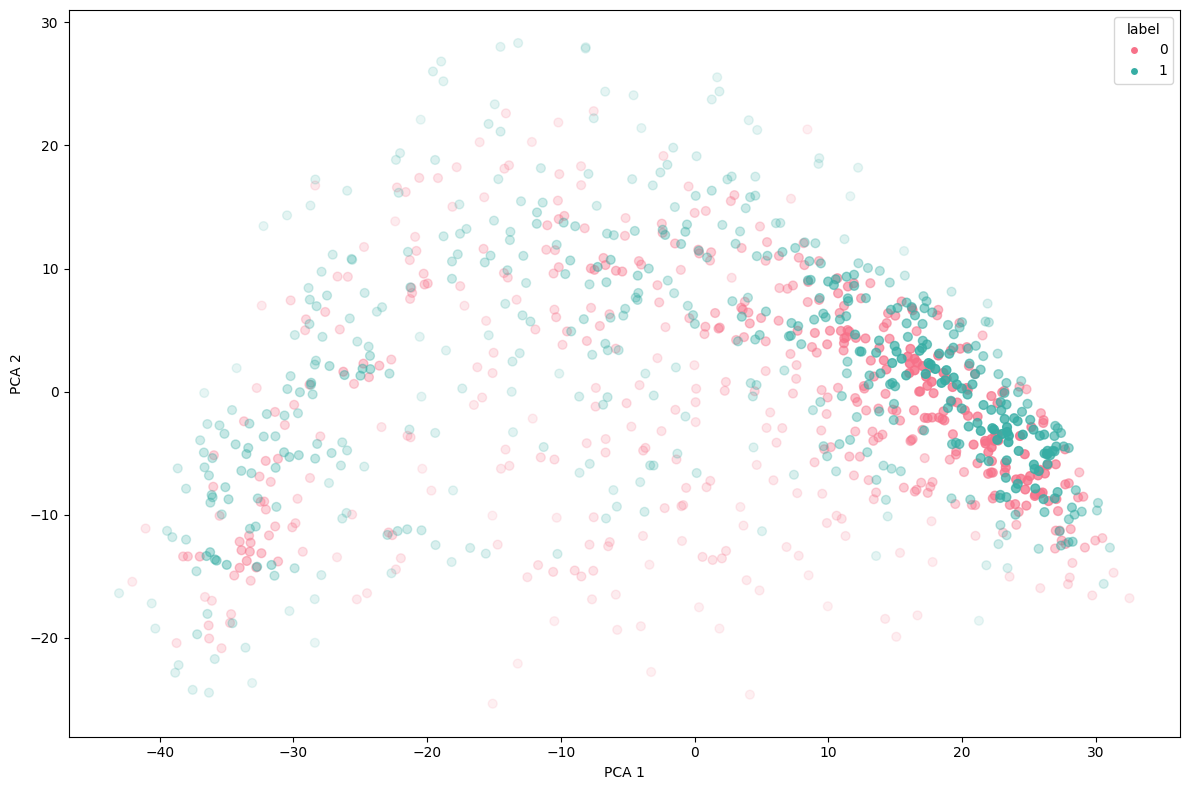

In [11]:
instance.plotDensityPCA(
    resolution=(1200,800),
    alpha_range=(0.1,0.9), 
    point_size=40, 
    dim_reduction_method='pca',
    title = None,
    )

In [12]:
instance.saveEmbeddings("../processed_dataset/protein_solubility/mistral")

2025-04-18 14:41:31,835 - ProteinEmbedder_RaphaelMourad/Mistral-Prot-v1-134M - INFO - Embeddings saved to ../processed_dataset/protein_solubility/mistral (ProteinEmbedder.py:465)


### Testing memory clearing

In [18]:
instance.showMemoryUsage()

2025-04-07 12:04:21,222 - ProteinEmbedder_ElnaggarLab/ankh2-ext1 - INFO - Current memory usage: 8.12 MB (ProteinEmbedder.py:92)


In [8]:
instance.cleanGPUMemory()

2025-04-07 12:08:37,359 - ProteinEmbedder_ElnaggarLab/ankh2-ext1 - INFO - Cleaning GPU memory (ProteinEmbedder.py:95)


In [16]:
instance.showMemoryUsage()

2025-04-02 15:08:04,887 - ProteinEmbedder_ElnaggarLab/ankh2-ext1 - INFO - Current memory usage: 8.12 MB (ProteinEmbedder.py:91)


### Load a previously saved embedding

In [13]:
instance.loadEmbeddings("../processed_dataset/protein_solubility/mistral.npz")

2025-04-18 14:41:48,709 - ProteinEmbedder_RaphaelMourad/Mistral-Prot-v1-134M - INFO - Embeddings loaded from ../processed_dataset/protein_solubility/mistral.npz (ProteinEmbedder.py:479)


(2, 50)


(<Figure size 1200x800 with 1 Axes>,
         PCA_1      PCA_2                                           sequence  \
 0   22.653437  -4.075417  MGRISSGGMMFKAITTVAALVIATSAMAQDDLTISSLAKGETTKAA...   
 1  -16.738029   6.240201  MVRIQRGKLLAFCLCVMATVFLLITLQVVVELGKFEGKKFKNSHLK...   
 2   -5.882412 -15.997444  MRVIITGGGTGGHVYPALAIARGLKEARPGVELLYIGTARGLEADV...   
 3   19.862276  16.914082  MNKIQIPWEERPVGCTDVMWRYSQNPVIGRYHIPSSNSIFNSAVVP...   
 4    1.071969   9.750988  MKFLHTVAQTATLLLSLGASVEGFNRARNDACKPHHPFRPLPASTP...   
 5   33.505058  17.365845  MQGQAQQQAYDRGITIFSPDGRLYQVEYAREAVKRGTASVGIRTPD...   
 6   -8.018819 -13.794356  MTRKYFGTDGIRGHVGQAPITPDFMLKLGWAAGMAFRKQGKCRILI...   
 7   -9.945397   1.423277  MAHAARLLAALAALLAAAATGDARPSKIAVVGAGIGGSAVAHFLQQ...   
 8  -19.580076   6.656833  MRRYLAVRGGAGDVAEPDLNAKPQDNLYLAVNSEWLSKAEIPADQT...   
 9  -21.471100  11.614548  MAVAHNLGFPRIGADRELKKALEAYWKGELDEQGLRQVGRQLRARH...   
 10 -11.308880 -18.847532  MSRYGLQQLYINGAYVDSTGNDTFDAVNPANGDIIACIQSATAADV...   
 11

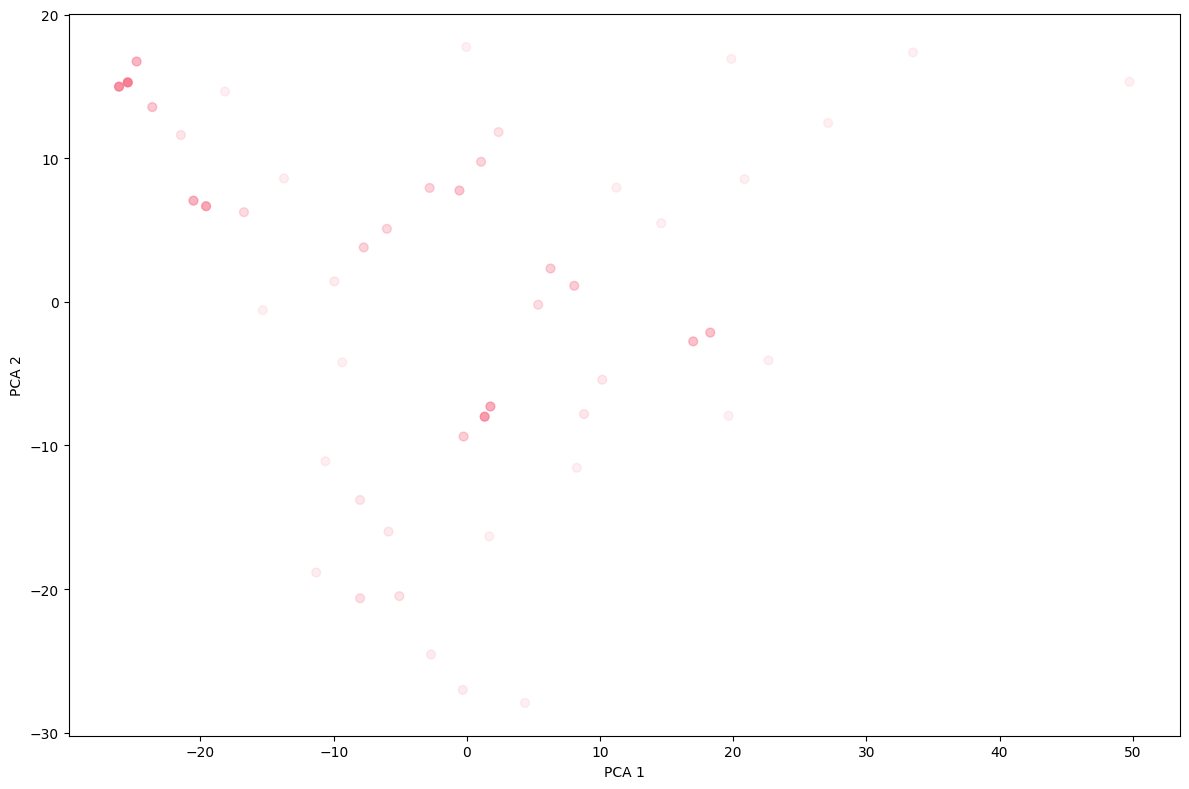

In [14]:
instance.plotDensityPCA(
    resolution=(1200,800),
    alpha_range=(0.1,0.9), 
    point_size=40, 
    dim_reduction_method='pca',
    title = None,
    )